### ISM model


In [68]:
#%matplotlib notebook
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex,HTML
from matplotlib import pyplot
import matplotlib.pylab as plt
import seaborn as sns
import os
import pygraphviz as pgv
from pygraphviz import *
from collections import defaultdict 

%autosave 5

Autosaving every 5 seconds


In [69]:
print("Enter File Name")
base_path = os.getcwd()
while True:
    filename = input()
    full_path = os.path.join(base_path,filename)
    if  os.path.isfile(full_path):
        print("file found")
        break
    else:
        print("file not found. please enter proper input file name or place the file in  the same directory")

file_id = filename.split('.')[0]

html_file = open(file_id+".html", 'w')
    

Enter File Name
failsal_thalib.csv
file found


## Initial Reachability Matrix


In [70]:
#/Users/saching12/Desktop/python codes/ISM/
df = pd.read_csv(full_path, delim_whitespace=True, index_col=0)
name = " <h3>Structural Self-Interaction Matrix : </h3>"
display(Markdown(name))
html_file.write(name + "\n\n")
html_file.write(df.to_html() + "\n\n")
display(df)
IPM = np.empty(df.shape, dtype=int)

size = len(df.columns)
i = 0
# index is not being used
for index, row in df.iterrows():
    size = len(df.columns)
    while size > 0:
        if i == size - 1:
            IPM[size - 1][i] = 1
        elif pd.isnull(row[str(size)]):
            break
        else:
            if row[str(size)] == 'V':
                IPM[i][size - 1] = 1
                IPM[size - 1][i] = 0
            elif row[str(size)] == 'A':
                IPM[i][size - 1] = 0
                IPM[size - 1][i] = 1
            elif row[str(size)] == 'X':
                IPM[i][size - 1] = 1
                IPM[size - 1][i] = 1
            elif row[str(size)] == 'O':
                IPM[i][size - 1] = 0
                IPM[size - 1][i] = 0
            else:
                print("Invalid Output")
        size -= 1
    i += 1




FRM = IPM.copy()
FRM = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
name = " <h3>Initial Reachability Matrix : </h3>"
html_file.write(name + "\n\n")
html_file.write(FRM.to_html() + "\n\n")
display(Markdown(name))
FRM


 <h3>Structural Self-Interaction Matrix : </h3>

,12,11,10,9,8,7,6,5,4,3,2,1
parameters,,,,,,,,,,,,
1,V,V,V,V,V,V,V,V,V,V,V,NaN
2,A,A,A,O,A,A,O,A,A,A,NaN,NaN
3,V,V,V,V,V,O,V,A,X,NaN,NaN,NaN
4,X,V,V,V,V,V,O,A,NaN,NaN,NaN,NaN
5,V,V,V,V,V,V,V,NaN,NaN,NaN,NaN,NaN
6,O,V,A,V,A,O,NaN,NaN,NaN,NaN,NaN,NaN
7,A,V,A,O,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,V,V,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,O,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 <h3>Initial Reachability Matrix : </h3>

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,0,1,1,1,1,1
4,0,1,1,1,0,0,1,1,1,1,1,1
5,0,1,1,1,1,1,1,1,1,1,1,1
6,0,0,0,0,0,1,0,0,1,0,1,0
7,0,1,0,0,0,0,1,0,0,0,1,0
8,0,1,0,0,0,1,1,1,1,1,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0
10,0,1,0,0,0,1,1,0,1,1,1,0


In [71]:
n = IPM.shape[0]   
FRM = IPM.copy()
for  i in range(n):
    for j in range(n):
        if FRM[i,j] == 1:           
            for k in range(n):
                if FRM[j,k] == 1:
                    FRM[i,k] = 1

FRM_df = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
name = " <h3>Final Reachability Matrix : </h3>"
display(Markdown(name))
display(FRM_df)  
html_file.write(name + "\n\n")
html_file.write(FRM_df.to_html() + "\n\n")

 <h3>Final Reachability Matrix : </h3>

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,1,1,1,1,1,1
4,0,1,1,1,0,1,1,1,1,1,1,1
5,0,1,1,1,1,1,1,1,1,1,1,1
6,0,1,0,0,0,1,0,0,1,0,1,0
7,0,1,0,0,0,0,1,0,1,0,1,0
8,0,1,0,0,0,1,1,1,1,1,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0
10,0,1,0,0,0,1,1,0,1,1,1,0


3241

In [72]:
# ## Final Reachability Matrix
# n = IPM.shape[0]   
# FRM = IPM.copy()
# for  k in range(n):
#     for i in range(n):
#         for j in range(n):
#             FRM[i,j]= FRM[i][j] or (FRM[i][k] and FRM[k][j])

# FRM_df = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
# name = " <h3>Final Reachability Matrix : </h3>"
# display(Markdown(name))
# display(FRM_df)

In [73]:
## Creating barrier level
frm = pd.DataFrame(columns=['Parameter', 'Reachability_set', 'Level'], dtype=np.int8)
for i, row in enumerate(FRM):
    sub_list = []
    for index, val in enumerate(row):
        if val == 1:
            sub_list.append(index + 1)

    frm = frm.append({'Parameter': i + 1, 'Reachability_set': set(sub_list)}, ignore_index=True)

Antecedent_set = {}
Intersection_set = {}

for i, column in enumerate(FRM.T):
    sub_list = []
    for index, val in enumerate(column):
        if val == 1:
            sub_list.append(index + 1)

    Antecedent_set[i + 1] = set(sub_list)
    
for index, Antecedent in Antecedent_set.items():
    [val] = frm[frm['Parameter'] == index]['Reachability_set'].values
#print(val)
    Intersection_set[index] = Antecedent.intersection(val)
    
    
Antecedent = pd.DataFrame(list(Antecedent_set.items()), columns=['Parameter', 'Antecedent_set'])
Intersection = pd.DataFrame(list(Intersection_set.items()), columns=['Parameter', 'Intersection_set'])

Antecedent = Antecedent.merge(Intersection, on='Parameter')
BLI = frm.merge(Antecedent, on='Parameter')

BLI_copy = BLI
name = " <h3>Initial Barrier Level : </h3>"
display(Markdown(name))
display(BLI_copy)
html_file.write(name + "\n\n")
html_file.write(BLI_copy.to_html() + "\n\n")

 <h3>Initial Barrier Level : </h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",NaN,{1},{1}
1,2,{2},NaN,"{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12}",{2}
2,3,"{2, 3, 4, 6, 7, 8, 9, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{2, 3, 4, 6, 7, 8, 9, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",NaN,"{1, 5}",{5}
5,6,"{9, 2, 11, 6}",NaN,"{1, 3, 4, 5, 6, 8, 10, 12}",{6}
6,7,"{9, 2, 11, 7}",NaN,"{1, 3, 4, 5, 7, 8, 10, 12}",{7}
7,8,"{2, 6, 7, 8, 9, 10, 11}",NaN,"{1, 3, 4, 5, 8, 12}",{8}
8,9,{9},NaN,"{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",{9}
9,10,"{2, 6, 7, 9, 10, 11}",NaN,"{1, 3, 4, 5, 8, 10, 12}",{10}


2310


# Barrier Level Iteration:



In [74]:

html_file.write("<h1>Barrier Level Iteration<h1>" + "\n\n")
BLI = BLI_copy
level = 1
removed_numbers = []
BLI_final = pd.DataFrame(columns=['Parameter', 'Reachability_set','Antecedent_set','Intersection_set', 'Level'], dtype=np.int8)
while len(BLI.index) > 0:
    tem_list = BLI[BLI['Reachability_set'] == BLI['Intersection_set']]['Parameter']
    if len(tem_list.tolist()) == 0:
        break
    removed_numbers += tem_list.tolist()
    BLI.loc[BLI['Reachability_set'] == BLI['Intersection_set'], 'Level'] = level
    iteration = " <h3>Iteration Number: "+str(level)+ '</h3>'
    display(Markdown(iteration))
    display(BLI)
    
    html_file.write(iteration + "\n\n")
    html_file.write(BLI.to_html() + "\n\n")
    for i in BLI.index:
        x = BLI.at[i,'Parameter']
        if x in removed_numbers:
            #print(BLI.loc[i]) 
            BLI_final = BLI_final.append(BLI.loc[i])
            BLI.at[i,'Intersection_set'] = None
            BLI = BLI.drop(i,axis = 0)
            
            continue
        else:
            Reachablility_temp = BLI.at[i,'Reachability_set']
            Reachablility_temp = [d for d in Reachablility_temp if float(d) not in removed_numbers]
            BLI.at[i,'Reachability_set'] =  set(Reachablility_temp)
            Antecedent_temp = BLI.at[i,'Antecedent_set']
            Antecedent_temp = [d for d in Antecedent_temp if d not in removed_numbers]
            BLI.at[i, 'Antecedent_set'] = set(Antecedent_temp)
            BLI.at[i,'Intersection_set'] = set(Antecedent_temp).intersection(set(Reachablility_temp))
    level += 1



 <h3>Iteration Number: 1</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",NaN,{1},{1}
1,2,{2},1.0,"{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12}",{2}
2,3,"{2, 3, 4, 6, 7, 8, 9, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{2, 3, 4, 6, 7, 8, 9, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",NaN,"{1, 5}",{5}
5,6,"{9, 2, 11, 6}",NaN,"{1, 3, 4, 5, 6, 8, 10, 12}",{6}
6,7,"{9, 2, 11, 7}",NaN,"{1, 3, 4, 5, 7, 8, 10, 12}",{7}
7,8,"{2, 6, 7, 8, 9, 10, 11}",NaN,"{1, 3, 4, 5, 8, 12}",{8}
8,9,{9},1.0,"{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",{9}
9,10,"{2, 6, 7, 9, 10, 11}",NaN,"{1, 3, 4, 5, 8, 10, 12}",{10}


 <h3>Iteration Number: 2</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 3, 4, 5, 6, 7, 8, 10, 11, 12}",NaN,{1},{1}
2,3,"{3, 4, 6, 7, 8, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{3, 4, 6, 7, 8, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{3, 4, 5, 6, 7, 8, 10, 11, 12}",NaN,"{1, 5}",{5}
5,6,"{11, 6}",NaN,"{1, 3, 4, 5, 6, 8, 10, 12}",{6}
6,7,"{11, 7}",NaN,"{1, 3, 4, 5, 7, 8, 10, 12}",{7}
7,8,"{6, 7, 8, 10, 11}",NaN,"{1, 3, 4, 5, 8, 12}",{8}
9,10,"{10, 11, 6, 7}",NaN,"{1, 3, 4, 5, 8, 10, 12}",{10}
10,11,{11},2.0,"{1, 3, 4, 5, 6, 7, 8, 10, 11, 12}",{11}
11,12,"{3, 4, 6, 7, 8, 10, 11, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"


 <h3>Iteration Number: 3</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 3, 4, 5, 6, 7, 8, 10, 12}",NaN,{1},{1}
2,3,"{3, 4, 6, 7, 8, 10, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{3, 4, 6, 7, 8, 10, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{3, 4, 5, 6, 7, 8, 10, 12}",NaN,"{1, 5}",{5}
5,6,{6},3.0,"{1, 3, 4, 5, 6, 8, 10, 12}",{6}
6,7,{7},3.0,"{1, 3, 4, 5, 7, 8, 10, 12}",{7}
7,8,"{8, 10, 6, 7}",NaN,"{1, 3, 4, 5, 8, 12}",{8}
9,10,"{10, 6, 7}",NaN,"{1, 3, 4, 5, 8, 10, 12}",{10}
11,12,"{3, 4, 6, 7, 8, 10, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"


 <h3>Iteration Number: 4</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 3, 4, 5, 8, 10, 12}",NaN,{1},{1}
2,3,"{3, 4, 8, 10, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{3, 4, 8, 10, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{3, 4, 5, 8, 10, 12}",NaN,"{1, 5}",{5}
7,8,"{8, 10}",NaN,"{1, 3, 4, 5, 8, 12}",{8}
9,10,{10},4.0,"{1, 3, 4, 5, 8, 10, 12}",{10}
11,12,"{3, 4, 8, 10, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"


 <h3>Iteration Number: 5</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 3, 4, 5, 8, 12}",NaN,{1},{1}
2,3,"{8, 3, 4, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{8, 3, 4, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{3, 4, 5, 8, 12}",NaN,"{1, 5}",{5}
7,8,{8},5.0,"{1, 3, 4, 5, 8, 12}",{8}
11,12,"{8, 3, 4, 12}",NaN,"{1, 3, 4, 5, 12}","{3, 4, 12}"


 <h3>Iteration Number: 6</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 3, 4, 5, 12}",NaN,{1},{1}
2,3,"{3, 4, 12}",6.0,"{1, 3, 4, 5, 12}","{3, 4, 12}"
3,4,"{3, 4, 12}",6.0,"{1, 3, 4, 5, 12}","{3, 4, 12}"
4,5,"{12, 3, 4, 5}",NaN,"{1, 5}",{5}
11,12,"{3, 4, 12}",6.0,"{1, 3, 4, 5, 12}","{3, 4, 12}"


 <h3>Iteration Number: 7</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,"{1, 5}",NaN,{1},{1}
4,5,{5},7.0,"{1, 5}",{5}


 <h3>Iteration Number: 8</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1,{1},8.0,{1},{1}


In [75]:
display(Markdown('<h2>Final Barrier Level Iteration</h2>'))
display(BLI_final)

html_file.write('<h2>Final Barrier Level Iteration</h2>' + "\n\n")
html_file.write(BLI_final.to_html() + "\n\n")

<h2>Final Barrier Level Iteration</h2>

,Parameter,Reachability_set,Antecedent_set,Intersection_set,Level
1,2,{2},"{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12}",{2},1.0
8,9,{9},"{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}",{9},1.0
10,11,{11},"{1, 3, 4, 5, 6, 7, 8, 10, 11, 12}",{11},2.0
5,6,{6},"{1, 3, 4, 5, 6, 8, 10, 12}",{6},3.0
6,7,{7},"{1, 3, 4, 5, 7, 8, 10, 12}",{7},3.0
9,10,{10},"{1, 3, 4, 5, 8, 10, 12}",{10},4.0
7,8,{8},"{1, 3, 4, 5, 8, 12}",{8},5.0
2,3,"{3, 4, 12}","{1, 3, 4, 5, 12}","{3, 4, 12}",6.0
3,4,"{3, 4, 12}","{1, 3, 4, 5, 12}","{3, 4, 12}",6.0
11,12,"{3, 4, 12}","{1, 3, 4, 5, 12}","{3, 4, 12}",6.0


2110

In [76]:
index = [int(d) for d in BLI_final['Parameter'].tolist()] 

FRM_df =FRM_df.reindex(index)
column = [str(d) for d in index] 
#column.append('Driving_power')
#print(column)
FRM_df = FRM_df[column]
display(Markdown('<h2>Conical Matrix:</h2>'))
display(FRM_df)
html_file.write('<h2>Conical Matrix:</h2>' + "\n\n")
html_file.write(FRM_df.to_html() + "\n\n")


<h2>Conical Matrix:</h2>

,2,9,11,6,7,10,8,3,4,12,5,1
2,1,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0
11,1,1,1,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0,0,0,0
7,1,1,1,0,1,0,0,0,0,0,0,0
10,1,1,1,1,1,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0
12,1,1,1,1,1,1,1,1,1,1,0,0


3241

## Digraph Plot

In [77]:
FRM_df_copy = FRM_df.copy()
FRM_df_copy.columns = FRM_df_copy.columns.astype(int)

for i in range(len(FRM_df_copy.columns)):
    FRM_df_copy.iloc[i,i] = 0


top_level_df = FRM_df_copy.sum(axis=1)
top_level_index = set(top_level_df[top_level_df == 0].index)
top_level_index = set(BLI_final[BLI_final.Level == 1.0].Parameter.astype(int).tolist())
bottom_level_df = FRM_df_copy.sum(axis=0)
display(bottom_level_df)
bottom_level_index = set(bottom_level_df[bottom_level_df == 0].index)

display(FRM_df_copy)
display(Markdown("<h3>Top level index : </h3>"))
display(top_level_index)
display(Markdown("<h3>Bottom level index : </h3>"))
display(bottom_level_index)


intersection = (top_level_index).intersection(bottom_level_index)

if len(intersection) > 0:
    bottom_level_index = bottom_level_index.difference(intersection)
    top_level_index = top_level_index.difference(intersection)
    FRM_df_copy = FRM_df_copy.drop(list(intersection),axis=0)
    FRM_df_copy = FRM_df_copy.drop(list(intersection),axis=1)
    
    

Relation_table = {}
for bottom_index in bottom_level_index:
    Relation_table[bottom_index] = []
    for top_index in top_level_index:
        if FRM_df_copy.at[bottom_index,top_index] == 1:
            Relation_table[bottom_index].append(top_index)

delete_key_list = []
display("Relation table")
display(Relation_table)   
## TODO: Check if it is working properly
print(list(Relation_table))
for key1, outer_value in Relation_table.items():
    if key1 in delete_key_list:
            continue
    for key2, inner_value in Relation_table.items():
        if key1 == key2:
            continue
        if set(Relation_table[key2]).issubset(set(Relation_table[key1])):
            if key2 not in delete_key_list:
                delete_key_list.append(key2)

print("delete key list")
print(delete_key_list)
for key1 in delete_key_list:
        del Relation_table[key1]

display(Relation_table)   

list_of_N = {}
j = 1
for key in Relation_table:
        index_list = Relation_table[key]        
        temp_df = FRM_df_copy.loc[:,index_list].copy()
        #print(temp_df)
        final_series = temp_df.iloc[:,0].copy()
        #print(final_series)
        for i in range(len(temp_df.columns)):
            final_series = final_series | temp_df.iloc[:,i]
        #    print(final_series)
        df_N = FRM_df_copy.copy()
        for i in range(len(df_N.columns)):    
            df_N.iloc[:,i] = df_N.iloc[:,i] & final_series
        list_of_N[key] = df_N.copy()   
        display(list_of_N[key])
        j+=1
del j        
print('---------->')
for key in list_of_N.keys():
    list_of_N[key]
    drop_rows = list_of_N[key].sum(axis=1)
    drop_rows_index = drop_rows[drop_rows == 0].index
    drop_columns = list_of_N[key].sum(axis=0)
    drop_columns_index = drop_columns[drop_columns == 0].index

    list_of_N[key] = list_of_N[key].drop(drop_rows_index,axis=0)
    list_of_N[key] = list_of_N[key].drop(drop_columns_index,axis=1)
    display(list_of_N[key])
    


2     10
9     10
11     9
6      7
7      7
10     6
8      5
3      4
4      4
12     4
5      1
1      0
dtype: int64

,2,9,11,6,7,10,8,3,4,12,5,1
2,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,0,0,0,0,0,0,0
8,1,1,1,1,1,1,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,1,1,0,0
4,1,1,1,1,1,1,1,1,0,1,0,0
12,1,1,1,1,1,1,1,1,1,0,0,0


<h3>Top level index : </h3>

{2, 9}

<h3>Bottom level index : </h3>

{1}

'Relation table'

{1: [9, 2]}

[1]
delete key list
[]


{1: [9, 2]}

,2,9,11,6,7,10,8,3,4,12,5,1
2,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,0,0,0,0,0,0,0
8,1,1,1,1,1,1,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,1,1,0,0
4,1,1,1,1,1,1,1,1,0,1,0,0
12,1,1,1,1,1,1,1,1,1,0,0,0


---------->


,2,9,11,6,7,10,8,3,4,12,5
11,1,1,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,0
10,1,1,1,1,1,0,0,0,0,0,0
8,1,1,1,1,1,1,0,0,0,0,0
3,1,1,1,1,1,1,1,0,1,1,0
4,1,1,1,1,1,1,1,1,0,1,0
12,1,1,1,1,1,1,1,1,1,0,0
5,1,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
graph=pgv.AGraph(directed=True)
edge_list = defaultdict(list) 

for key, N_val in list_of_N.items():
        graph.add_nodes_from(Relation_table[key])
        max_val = max_column = max(N_val.columns)
        max_row = max(N_val.index)
        if max_column < max_row:
            max_val = max_row
        while len(N_val.columns) > 0:
            drop_rows = N_val.sum(axis=1)
            drop_rows_index = drop_rows[drop_rows == 1].index            
            drop_columns = N_val.sum(axis=0)
            ###print("drop columns",drop_columns)
            drop_columns_index = drop_columns[drop_columns == 1].index
            ## Regular Row elemination
            ###print("drop row indexes",drop_rows_index)
            ###print("drop column indexes",drop_columns_index)
            ## debug point
            #display(N_val)
            if len(drop_rows_index) > 0 :
                print("in Row elemination mode")
                row_index = drop_rows_index[0]
                ### print("before updating c_j to ")

                ### display(N_val)

                ## step 1 : create a new column of c_j* = c_j * ~c_i
                ## get column name(index) whose value is 1 for the respective row
                d=N_val.loc[row_index]
                column_index = d[d == 1].index[0]
                print("column Index: ",column_index)
                print("row index: ",row_index)
                c_j = N_val.loc[:,column_index]   
                row_index_backup = row_index
                if row_index  > 500:
                    row_index = 1000 - int(row_index/10)
                if row_index in N_val.columns:
                    ## getting row value
                    
                    ## get c_i
                    c_i = N_val.loc[:,row_index].astype(bool)
                    print(c_i)
                    c_j = c_j * (~ c_i)
                
                ## update the connected subordinate matrix here it is N_val
                N_val.loc[:,column_index] = c_j   

                ## step 2 delete the row with row index and all rows and columns with all zeros

                N_val = N_val.drop(row_index_backup,axis=0)

                drop_rows = N_val.sum(axis=1)
                drop_rows_index = drop_rows[drop_rows == 0].index
                drop_columns = N_val.sum(axis=0)
                drop_columns_index = drop_columns[drop_columns == 0].index
                N_val = N_val.drop(drop_rows_index,axis=0)
                N_val = N_val.drop(drop_columns_index,axis=1)
                ## step 3: add the node to graph and connection

                edge_list[row_index].append((row_index,column_index))
                print("after adding to graph row and column to graph",row_index,column_index)

                #display(N_val)
            elif len(drop_columns_index) > 0 :
                print("in Column elemination mode")

                column_index = drop_columns_index[0]
                
                ## step 1 : create a new row of r_j* = r_j * ~r_i
                ## get row name(index) whose value is 1 for the respective row
                d=N_val.loc[:,column_index]
                row_index = d[d == 1].index[0]
                r_i = N_val.loc[row_index]     
                print("row index: ",row_index)
                print("Column index: ",column_index)
                #display(N_val)
                if column_index in N_val.index:
                    ## getting column value
                    ## get r_j i.e row with index of colun name
                    r_j = N_val.loc[column_index].astype(bool)
                    print(r_j)
                    r_i = r_i * (~ r_j)
#                 else:
#                     print("Column index: ",column_index)
#                     print("all the indexes: ",N_val.index)
#                 print("printing final_row_series")
#                 print(r_i)

#                 ## update the connected subordinate matrix here it is N_val
                print('r_i upadted---------->')
                print(r_i)
                N_val.loc[row_index] = r_i           
                
                ## step 2 delete the column with column index and all rows and columns with all zeros

                N_val = N_val.drop(column_index,axis=1)

                drop_rows = N_val.sum(axis=1)
                drop_rows_index = drop_rows[drop_rows == 0].index
                drop_columns = N_val.sum(axis=0)
                drop_columns_index = drop_columns[drop_columns == 0].index
                N_val = N_val.drop(drop_rows_index,axis=0)
                N_val = N_val.drop(drop_columns_index,axis=1)
                ## step 3: add the node to graph and connection
                #display(N_val)
                print('drop_rows:')
                print(drop_rows_index)
                print('drop_columns:')
                print(drop_columns_index)
                if row_index  > 500:
                    row_index = 1000 - int(row_index/10)
                edge_list[row_index].append((row_index,column_index))
                print("after adding to graph row and column to graph",row_index,column_index)

                display(N_val)
            else:
                print("in else mode")
                modify_row = N_val.sum(axis=1).sort_values(ascending=True)
                modify_row_index = modify_row.index[0]
                no_of_elements = len(N_val.columns)
                array = np.zeros(no_of_elements,dtype=int)
                input_row = pd.Series(array,index=N_val.columns)
                modify_row_values = N_val.loc[modify_row_index]
                column_indexes = modify_row_values[modify_row_values == 1].index
                for i,index in enumerate(column_indexes):
                    input_row[index] = 1
                    ind = (1000 - modify_row_index)*10 + i
                    N_val.loc[ind] = input_row
                    input_row[index] = 0
                N_val = N_val.drop(modify_row_index,axis=0)




in Column elemination mode
row index:  1
Column index:  5
2      True
9      True
11     True
6      True
7      True
10     True
8      True
3      True
4      True
12     True
5     False
Name: 5, dtype: bool
r_i upadted---------->
2     0
9     0
11    0
6     0
7     0
10    0
8     0
3     0
4     0
12    0
5     1
dtype: int64
drop_rows:
Int64Index([1], dtype='int64')
drop_columns:
Int64Index([], dtype='int64')
after adding to graph row and column to graph 1 5


,2,9,11,6,7,10,8,3,4,12
11,1,1,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0
10,1,1,1,1,1,0,0,0,0,0
8,1,1,1,1,1,1,0,0,0,0
3,1,1,1,1,1,1,1,0,1,1
4,1,1,1,1,1,1,1,1,0,1
12,1,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,1,1


in else mode
in Row elemination mode
column Index:  2
row index:  9890
6        True
7        True
10       True
8        True
3        True
4        True
12       True
5        True
9890    False
9891    False
Name: 11, dtype: bool
after adding to graph row and column to graph 11 2
in Row elemination mode
column Index:  9
row index:  9891
6        True
7        True
10       True
8        True
3        True
4        True
12       True
5        True
9891    False
Name: 11, dtype: bool
after adding to graph row and column to graph 11 9
in Row elemination mode
column Index:  11
row index:  6
6     False
7     False
10     True
8      True
3      True
4      True
12     True
5      True
Name: 6, dtype: bool
after adding to graph row and column to graph 6 11
in Row elemination mode
column Index:  11
row index:  7
7     False
10     True
8      True
3      True
4      True
12     True
5      True
Name: 7, dtype: bool
after adding to graph row and column to graph 7 11
in else mode
in Row ele

In [79]:
graph_levels = BLI_final[['Parameter','Level']].sort_values('Level',ascending=False)
for index ,row in graph_levels.iterrows():
    #for edge in edge_list[row['Parameter']]:
        graph.add_edges_from(edge_list[row['Parameter']])

In [80]:
for index ,row in test.iterrows():
    #for edge in edge_list[row['Parameter']]:
        graph.add_edges_from(edge_list[row['Parameter']])
graph.layout(prog='dot')        
graph.draw(file_id+'.png')

In [12]:
!rm -rf $file_id

## Dependency power and Driving power

In [13]:
dependency_power = FRM_df.sum(axis=0).rename("Dependency_power")
Driving_power = FRM_df.sum(axis=1)
#print(type(Driving_power))
#dependency_power =dependency_power.rename("Dependency_power")
FRM_df = FRM_df.append(dependency_power)
FRM_df['Driving_power'] = Driving_power
html_file.write('<h2>Dependency power and Driving power:</h2>' + "\n\n")
html_file.write(FRM_df.to_html() + "\n\n")
FRM_df

,8,20,9,15,19,21,17,18,10,11,...,16,4,6,13,7,5,2,3,1,Driving_power
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,8.0
15,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,8.0
19,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
21,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,8.0
17,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
18,0,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
10,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,9.0
11,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,9.0


## Dependency power and Driving power Diagram 

In [14]:
plot_frame = pd.DataFrame()
plot_frame['Dependency_power'] = FRM_df.loc['Dependency_power'].dropna().tolist()
plot_frame['Driving_power'] = Driving_power.tolist()
plot_frame['Parameters'] = list(map(int,BLI_final['Parameter'].tolist()))

In [15]:
from collections import Counter
combos =  list(zip(plot_frame.Dependency_power, plot_frame.Driving_power))
list_of_combos = Counter(combos)

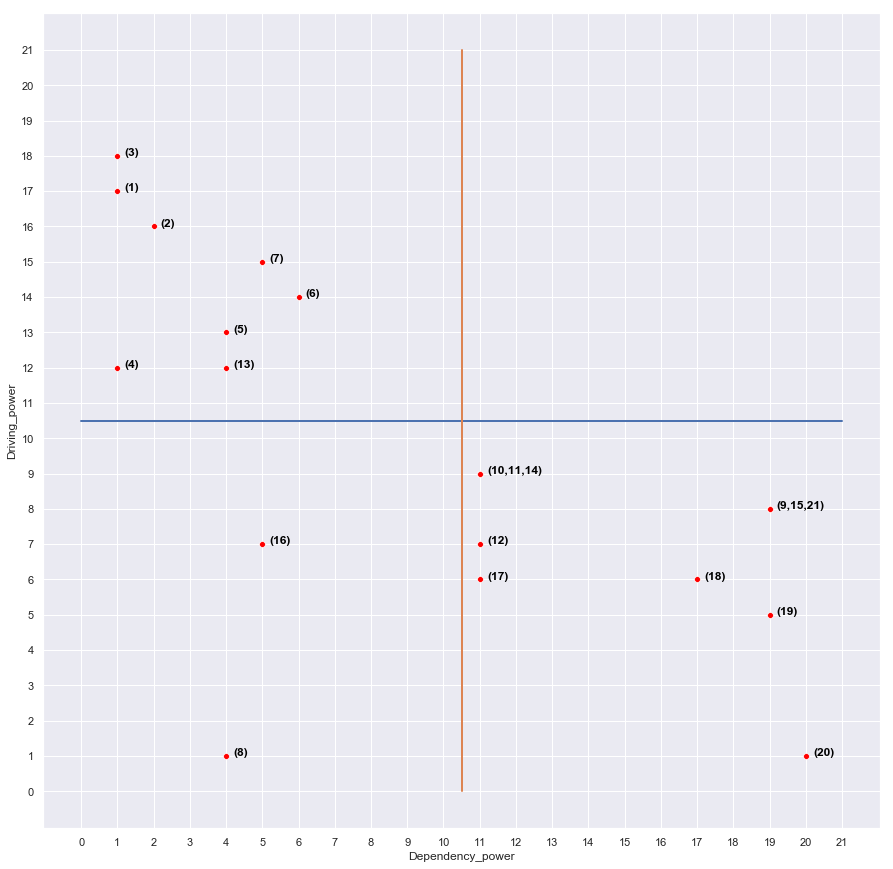

In [19]:
plt.clf()
plt.rcParams['figure.figsize'] = [15, 15]
plt.xticks(np.arange(0, max(plot_frame['Parameters'])+1, 1.0))
plt.yticks(np.arange(0, max(plot_frame['Parameters'])+1, 1.0))

sns.set(style="darkgrid")
sns_p1t=sns.scatterplot(data=plot_frame, x="Dependency_power", y="Driving_power",color='red' )
shift = 0.2

for (dependency, drive), size in list_of_combos.items():
    parameters = plot_frame[(plot_frame.Dependency_power == dependency) & (plot_frame.Driving_power == drive)].Parameters.tolist()
    text ="(" + ",".join(map(str,parameters)) + ")"
    sns_p1t.text(dependency+shift, drive, text, horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.plot([0, max(plot_frame['Parameters'])], [max(plot_frame['Parameters'])/2, max(plot_frame['Parameters'])/2], linewidth=2)
plt.plot([max(plot_frame['Parameters'])/2, max(plot_frame['Parameters'])/2], [0, max(plot_frame['Parameters'])], linewidth=2)
plot_file = file_id+'_dependencyplot.png'
plt.savefig(plot_file)




In [20]:
html_file.write('<h2>Dependency power and Driving power plot</h2>' + "\n\n")
html_file.write('<img src=\''+plot_file+'\'>' + "\n\n")
html_file.close()